In [15]:
#Importing modules to use
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.pyplot import get_cmap
from google.colab import drive
import os
import pandas

drive.mount('/content/drive')
path = '/content/drive/My Drive/fortran/' #Path where data file is stored
os.chdir(path);

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
plt.rcdefaults() #Restore the rc params to default

#Customize properties of the plots
plt.style.use('dark_background')
plt.rc('font', size = 12)
plt.rc('axes', titlesize = 10)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('legend', fontsize = 11)

plt.rcParams['lines.markersize'] = 12
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['axes.formatter.use_mathtext'] = True

In [3]:
#Path to the data file
dataFile = 'time.dat'

# Reading data file
data = pandas.read_csv(dataFile, sep = '\s+', skiprows = 2)

#Extracting time and particle values from data file
t_ex1 = data['t_ex1']
t_barnes = data['t_barnes']
t_OMP = data['t_OMP']
t_MPI = data['t_MPI']
particle = data['Particles']

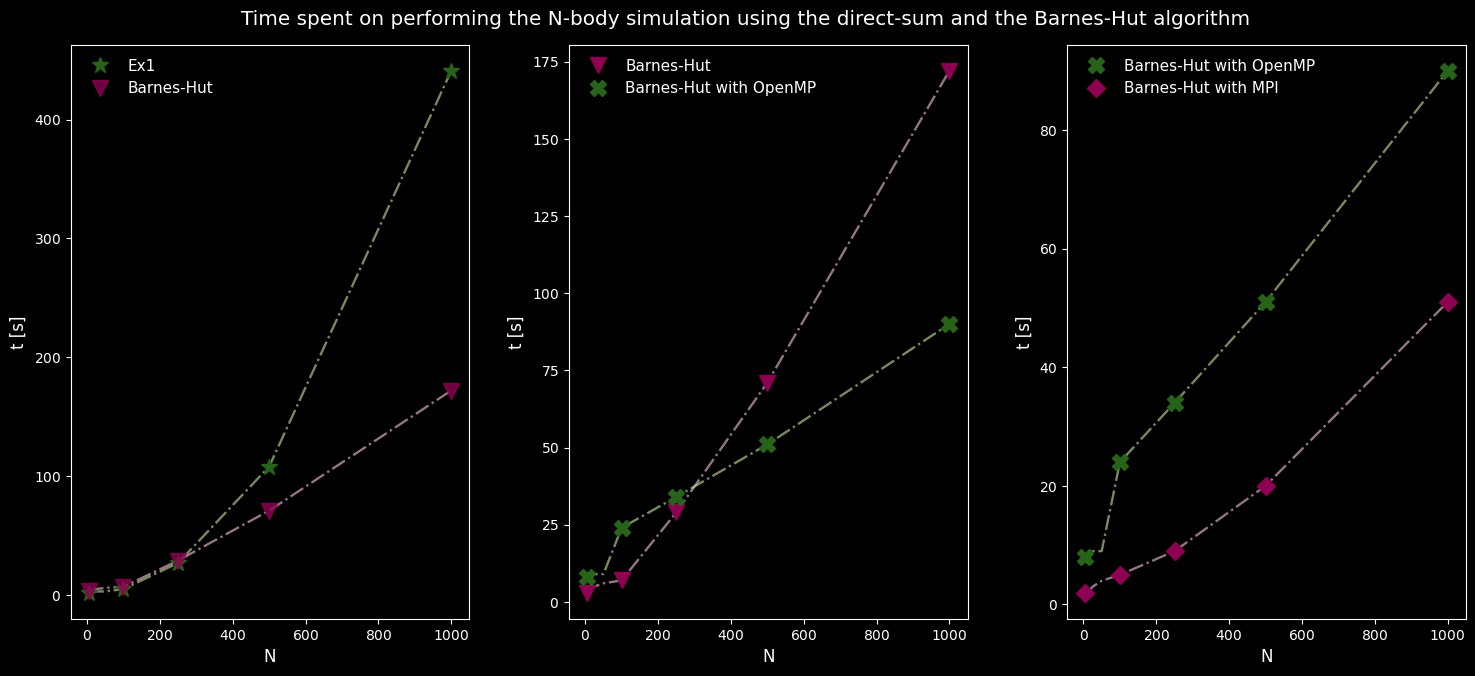

In [35]:
cmap = get_cmap('PiYG_r')  # Color map for the plots
colors = cmap(np.linspace(0, 1, 4)) #Colors from the color map to use in the plots

#Set different values for plotting the orders of the algorithms
alpha = 0.6 #Transparency
lw = 1.7 #Line width
ls = '-.' #Linestyle

size_ex1 = np.size(t_ex1) #Size of the time spent on the direct-sum algorithm array

#Plot the time spent on performing the N-body simulation for the different algorithms
plt.figure(figsize=(18, 7))

#Plot the time spent for the direct-sum and the Barnes-Hut algorithm
plt.subplot(131)
#Direct-sum algorithm used in exercise 1
plt.plot(particle, t_ex1, color=colors[1],  lw = lw, ls = ls, alpha = alpha)

#Barnes-Hut algorithm
plt.plot(particle, t_barnes, color=colors[2], lw = lw, ls = ls, alpha = alpha)

#Dots for direct-sum algorithm plot
plt.plot(particle[0], t_ex1[0], '*', label='Ex1', color=colors[0])
plt.plot(particle[4:], t_ex1[4:], '*', color=colors[0])

#Dots for Barnes-Hut algorithm plot
plt.plot(particle[0], t_barnes[0], 'v', label='Barnes-Hut', color=colors[3], alpha = 0.8)
plt.plot(particle[4:], t_barnes[4:], 'v', color=colors[3], alpha = 0.8)

plt.xlabel('N')
plt.ylabel('t [s]')
plt.legend(loc='upper left', frameon = False)

#Plot the time spent for the Barnes-Hut algorithm with and without parallelization with OpenMP
plt.subplot(132)

#Non-parallelized Barnes-Hut algorithm
plt.plot(particle, t_barnes, color=colors[2], lw = lw, ls = ls, alpha = alpha)

#Parallelized Barnes-Hut algorithm with OpenMP
plt.plot(particle, t_OMP, color=colors[1], lw = lw, ls = ls, alpha = alpha)

#Dots for non-parallelized Barnes-Hut algorithm plot
plt.plot(particle[0], t_barnes[0], 'v', label='Barnes-Hut', color=colors[3])
plt.plot(particle[4:], t_barnes[4:], 'v', color=colors[3])

#Dots for parallelized Barnes-Hut algorithm with OpenMP plot
plt.plot(particle[0], t_OMP[0], 'X', label='Barnes-Hut with OpenMP', color=colors[0])
plt.plot(particle[4:], t_OMP[4:], 'X', color=colors[0])

plt.xlabel('N')
plt.ylabel('t [s]')
plt.legend(loc='upper left', frameon = False)

#Plot the time spent for the Barnes-Hut algorithm with parallelization with OpenMP and MPI
plt.subplot(133)

#Parallelized Barnes-Hut algorithm with OpenMP
plt.plot(particle, t_OMP, color=colors[1], lw = lw, ls = ls, alpha = alpha)

#Parallelized Barnes-Hut algorithm with MPI
plt.plot(particle, t_MPI, color=colors[2], lw = lw, ls = ls, alpha = alpha)

#Dots for parallelized Barnes-Hut algorithm with OpenMP plot
plt.plot(particle[0], t_OMP[0], 'X', label='Barnes-Hut with OpenMP', color=colors[0])
plt.plot(particle[4:], t_OMP[4:], 'X', color=colors[0])

#Dots for parallelized Barnes-Hut algorithm with MPI plot
plt.plot(particle[0], t_MPI[0], 'D', markersize = 9, label='Barnes-Hut with MPI', color=colors[3])
plt.plot(particle[4:], t_MPI[4:], 'D', markersize = 9, color=colors[3])

plt.xlabel('N')
plt.ylabel('t [s]')
plt.legend(loc='upper left', frameon = False)

#Title
plt.suptitle('Time spent on performing the N-body simulation using the direct-sum and the Barnes-Hut algorithm')

plt.subplots_adjust(wspace = 0.25, top = 0.93)
plt.show()

This plot shows the time spent on performing the N-body simulation using the direct-sum and the Barnes-Hut algorithm for various sets of particles ($N$). The simulations have been carried out on a 4-cores computer with a time step of $dt = 0.01$, an output time step of $dt_{out} = 0.1$ and a final time of $t_{final} = 50$. For the Barnes-Hut algorithm, the $\theta$ parameter was adjusted based on the number of particles, with smaller values used for fewer particles to have more accurate results. The direct-sum algorithm implemented in exercise 1 is of order $O(N^2)$, while the Barnes-Hut algorithm is of order $O(N \ logN)$.

As shown in the first panel by the left, the Barnes-Hut algorithm is much faster than the direct-sum one for a large number of particles. This is due to the way the forces between particles are calculated. However, if we have few particles, it's more efficient to use the direct-sum algorithm because the Barnes-Hut will take more time to perform the simulation as it has to build the tree and recursively compute the center of mass and total mass for each cell.

In the central panel,
we observe that the OpenMP-parallelized version of the Barnes-Hut algorithm takes more time to perform simulations with a small number of particles. This is expected, as parallelization introduces overhead that outweights its benefits. However, for simulations involving a large number of particles, the parallelized code becomes computationally faster as the benefits of parallel processing $-$such as distributing workloads across multiple cores$-$ outweigh the initial overhead.

As we can deduce from the last panel, the MPI-parallelized version of the Barnes-Hut algorithm significantly outperforms the OpenMP version in terms of execution speed. This is because OpenMP is designed to parallelize tasks within a single node, using a set of cores for these simulations. In contrast, MPI distributes the workload across multiple processes, making use of more resources and thereby reducing execution time. As a result, MPI handles large numbers of particles more effectively by distributing them across processes, preventing overload on a single node’s resources. OpenMP, on the other hand, struggles to manage larger particle sets within the limited resources of a single node.